# Model training with fixed Xeff

## Load data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [3]:
outdir = "out_positive_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_positive_xeff.pkl")

In [4]:
data

q  xeff                                                 a1  \
0   0.1   0.1  [0.012024048096192383, 0.014003959823454523, 0...   
1   0.1   0.2  [0.1222444889779559, 0.12400351805816039, 0.12...   
2   0.1   0.3  [0.23246492985971942, 0.23400307629286626, 0.2...   
3   0.1   0.4  [0.3426853707414829, 0.3440026345275721, 0.345...   
4   0.1   0.5  [0.45290581162324645, 0.454002192762278, 0.455...   
..  ...   ...                                                ...   
85  1.0   0.5  [0.002004008016032064, 0.004003999983935807, 0...   
86  1.0   0.6  [0.20240480961923846, 0.2040031967743101, 0.20...   
87  1.0   0.7  [0.40280561122244485, 0.4040023935646844, 0.40...   
88  1.0   0.8  [0.6032064128256512, 0.6040015903550587, 0.604...   
89  1.0   0.9  [0.8036072144288576, 0.8040007871454331, 0.804...   

                                                 p_a1  
0   [0.009216418726310445, 0.028458441503637077, 0...  
1   [0.0013008215791223796, 0.004041149522956928, ...  
2   [0.0010697856954987733, 0.0024382824268816272,...  
3   [0.0009629691381983512, 0.00222891654232283, 0...  
4   [0.001315515963205737, 0.0027549382395791115, ...  
..                                                ...  
85  [0.004842086019793161, 0.00951858515585301, 0....  
86  [0.0010434286955042496, 0.0013208399318507351,...  
87  [0.0018007422164230593, 0.0023384387900644075,...  
88  [0.0032252396366210193, 0.004504994041532742, ...  
89  [0.027112218815555603, 0.03243686299175742, 0....  

[90 rows x 4 columns]

## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [5]:
# data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)
# data.reset_index(drop=True, inplace=True)

### Spliting data into train and test

In [6]:
# # a1
# a1 = []
# for i in range(len(data)):
#     a1.append(data['a1'][i])
# a1 = np.array(a1)
# # p
# p = []
# for i in range(len(data)):
#     p.append(data['p_a1'][i])
# p = np.array(p)
# # q
# q = []
# for i in data['q'].values:
#     for j in range(len(a1[0])):
#         q.append(i)
# q = np.array(q)
# # xeff 
# xeff = []
# for i in data['xeff'].values:
#     for j in range(len(a1[0])):
#         xeff.append(i)
# xeff = np.array(xeff)

# a1 = a1.flatten()
# p = p.flatten()

# print(xeff.shape, q.shape, p.shape, a1.shape)

Nice

## Split data into train and test

In [7]:
q = data['q'].values
xeff = data['xeff'].values
p = data['p_a1'].values
a1 = data['a1'].values

In [8]:
# # split into train and test
# from sklearn.model_selection import train_test_split
# train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
# = train_test_split(q, xeff, p, a1,
#  test_size=0.2, random_state=42)

# train_q_xeff =  np.stack((train_q, train_xeff), axis=1)

### Train the network with fixed xeff

In [9]:
# 
ls_q = [] # list of q
ls_p = []   # list of p
ls_a1 = []  # list of a1
for i in range(len(q)):
    if xeff[i] == 0.3:
        for j in range(len(a1[0])):
            ls_q.append(q[i])
        ls_p.append(p[i])
        ls_a1.append(a1[i])
ls_q = np.array(ls_q)
ls_p = np.array(ls_p)
ls_a1 = np.array(ls_a1)

In [10]:
ls_q = ls_q.reshape(len(ls_p), len(ls_p[0]))

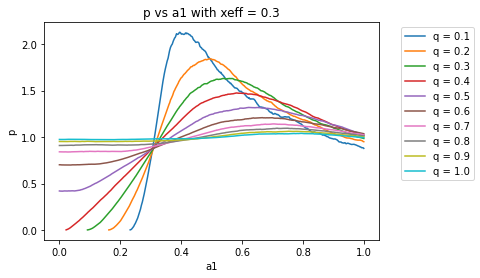

In [11]:
# plot the data
for i in range(len(ls_p)):
    plt.plot(ls_a1[i], ls_p[i], label = f'q = {ls_q[i,0]}')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('p vs a1 with xeff = 0.3')
    plt.xlabel('a1')
    plt.ylabel('p')

## Define evoluation function

In [12]:
def eva_model(model):
    # evaluate the model
    global test_a1
    global test_p
    scores = model.evaluate([ls_q, ls_a1],ls_p)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    # plot history
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    #plt.legend(['train', 'val'], loc='upper left')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    #
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    #plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.title('model loss')
    plt.show()
    #
    test_p_pred = model.predict([ls_q, ls_a1])
    # # test_p_pred = scaler_p.inverse_transform(test_p_pred)
    # # test_p = scaler_p.inverse_transform(test_p)
    # # test_a1 = scaler_a.inverse_transform(test_a1)
    # plt.plot(ls_a1[3],test_p_pred[3],label = 'pred',color = 'red',linestyle='dotted')
    # plt.plot(ls_a1[3],ls_p[3],label = 'true',color = 'blue',linestyle='-')
    # plt.title(f'prediction vs true p_a1 for q = {ls_q[3][0]}, xeff = {0.3}')
    # plt.legend()
    # plt.xlabel('a1')
    # plt.ylabel('p')
    # plt.show()
    # #
    # plt.plot(ls_a1[5],test_p_pred[5],label = 'pred',color = 'red',linestyle='dotted')
    # plt.plot(ls_a1[5],ls_p[5],label = 'true',color = 'blue',linestyle='-')
    # plt.title(f'prediction vs true p_a1 for q = {ls_q[5][0]}, xeff = {0.3}')
    # plt.legend()
    # plt.xlabel('a1')
    # plt.ylabel('p')
    # plt.show()
    plt.figure(dpi=600,facecolor='white')
    for i in range(len(test_p_pred)):
        plt.plot(ls_a1[i],test_p_pred[i],linestyle='dotted', label = f'pred q = {ls_q[i,0]}',alpha = 0.5)
        plt.plot(ls_a1[i],ls_p[i],linestyle='dashed',alpha = 0.5)
        plt.title(f'prediction vs true p_a1 for xeff = {0.3}')
        plt.legend(['predicted','actual'],bbox_to_anchor=(1.05, 1))
        plt.xlabel('a1')
        plt.ylabel('p')
    plt.show()


## Training

In [12]:
Input1 = Input(shape=(len(ls_q[0]),))
Input2 = Input(shape=(len(ls_a1[0]),))
merged = keras.layers.concatenate([Input1, Input2]) # 1000 elements
x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) 
#
# callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=200)
model = Model(inputs=[Input1,Input2], outputs=output)
# opt = keras.optimizers.Adam(learning_rate=3e-2)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit([ls_q, ls_a1],ls_p, epochs=5500,batch_size=40, verbose=2)

Epoch 1/5500
1/1 - 0s - loss: 1.3030 - accuracy: 0.0000e+00 - 344ms/epoch - 344ms/step
Epoch 2/5500
1/1 - 0s - loss: 0.8466 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 3/5500
1/1 - 0s - loss: 0.5996 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 4/5500
1/1 - 0s - loss: 0.4163 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 5/5500
1/1 - 0s - loss: 0.2701 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 6/5500
1/1 - 0s - loss: 0.1877 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 7/5500
1/1 - 0s - loss: 0.1335 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 8/5500
1/1 - 0s - loss: 0.1027 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 9/5500
1/1 - 0s - loss: 0.0917 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 10/5500
1/1 - 0s - loss: 0.0910 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 11/5500
1/1 - 0s - loss: 0.0930 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 12/5500
1/1 - 0s - loss: 0.0911 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/st

1/1 [==============================] - 1s 511ms/step - loss: 1.5713e-06 - accuracy: 0.5000
accuracy: 50.00%


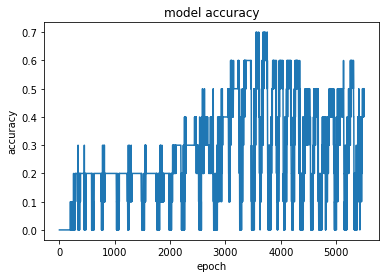

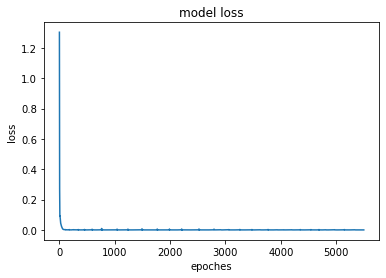

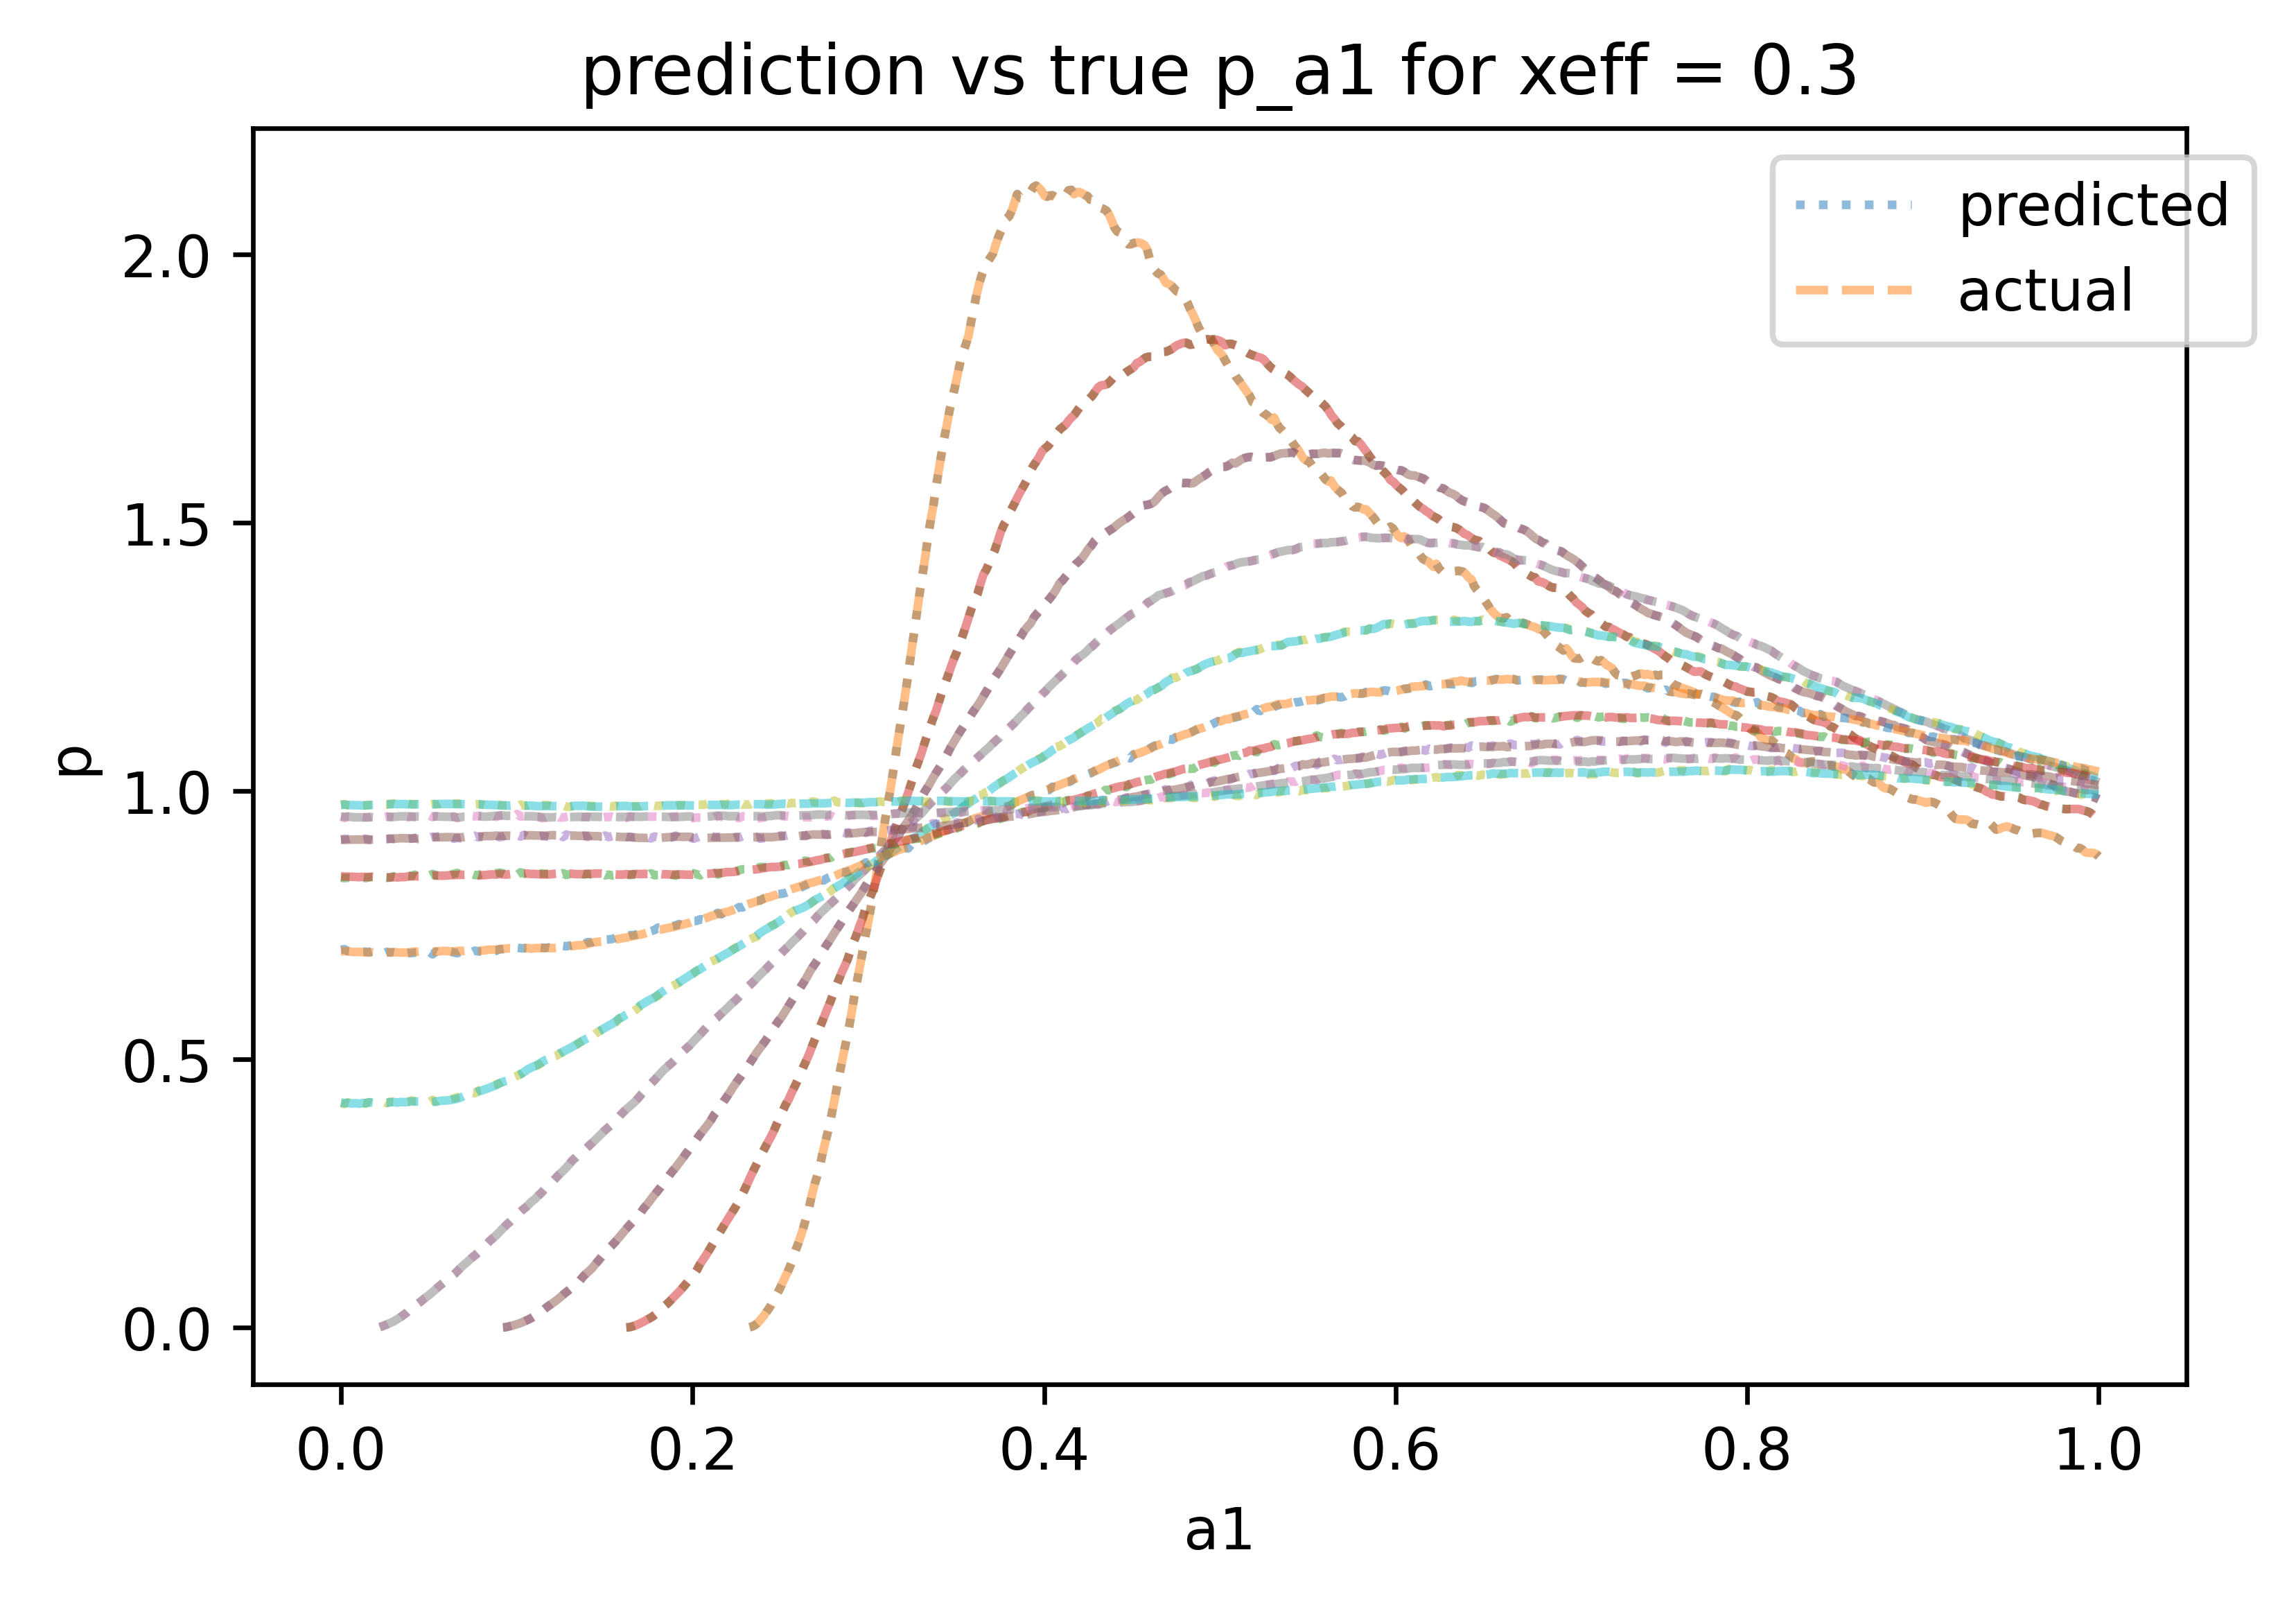

In [13]:
eva_model(model)

In [21]:
Input1 = Input(shape=(len(ls_q[0]),))
Input2 = Input(shape=(len(ls_a1[0]),))
merged = keras.layers.concatenate([Input1, Input2]) # 1000 elements
x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(512, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) 
#
# callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=200)
model = Model(inputs=[Input1,Input2], outputs=output)
# opt = keras.optimizers.Adam(learning_rate=3e-2)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit([ls_q, ls_a1],ls_p, epochs=5500,batch_size=40, verbose=2)

Epoch 1/5500
1/1 - 0s - loss: 1.0834 - accuracy: 0.0000e+00 - 399ms/epoch - 399ms/step
Epoch 2/5500
1/1 - 0s - loss: 0.8283 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 3/5500
1/1 - 0s - loss: 0.6405 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 4/5500
1/1 - 0s - loss: 0.5412 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 5/5500
1/1 - 0s - loss: 0.4796 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 6/5500
1/1 - 0s - loss: 0.4357 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 7/5500
1/1 - 0s - loss: 0.4078 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 8/5500
1/1 - 0s - loss: 0.3871 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 9/5500
1/1 - 0s - loss: 0.3721 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 10/5500
1/1 - 0s - loss: 0.3570 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 11/5500
1/1 - 0s - loss: 0.3417 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 12/5500
1/1 - 0s - loss: 0.3300 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/st

1/1 [==============================] - 1s 1s/step - loss: 0.1736 - accuracy: 0.3000
accuracy: 30.00%


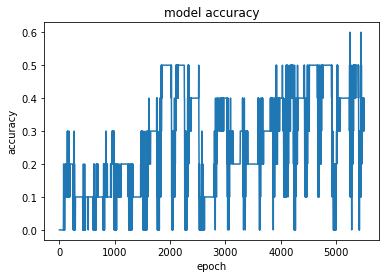

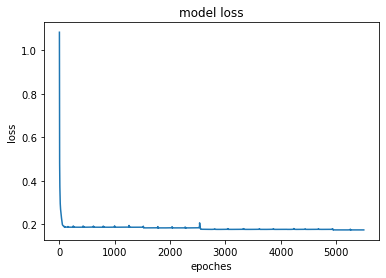

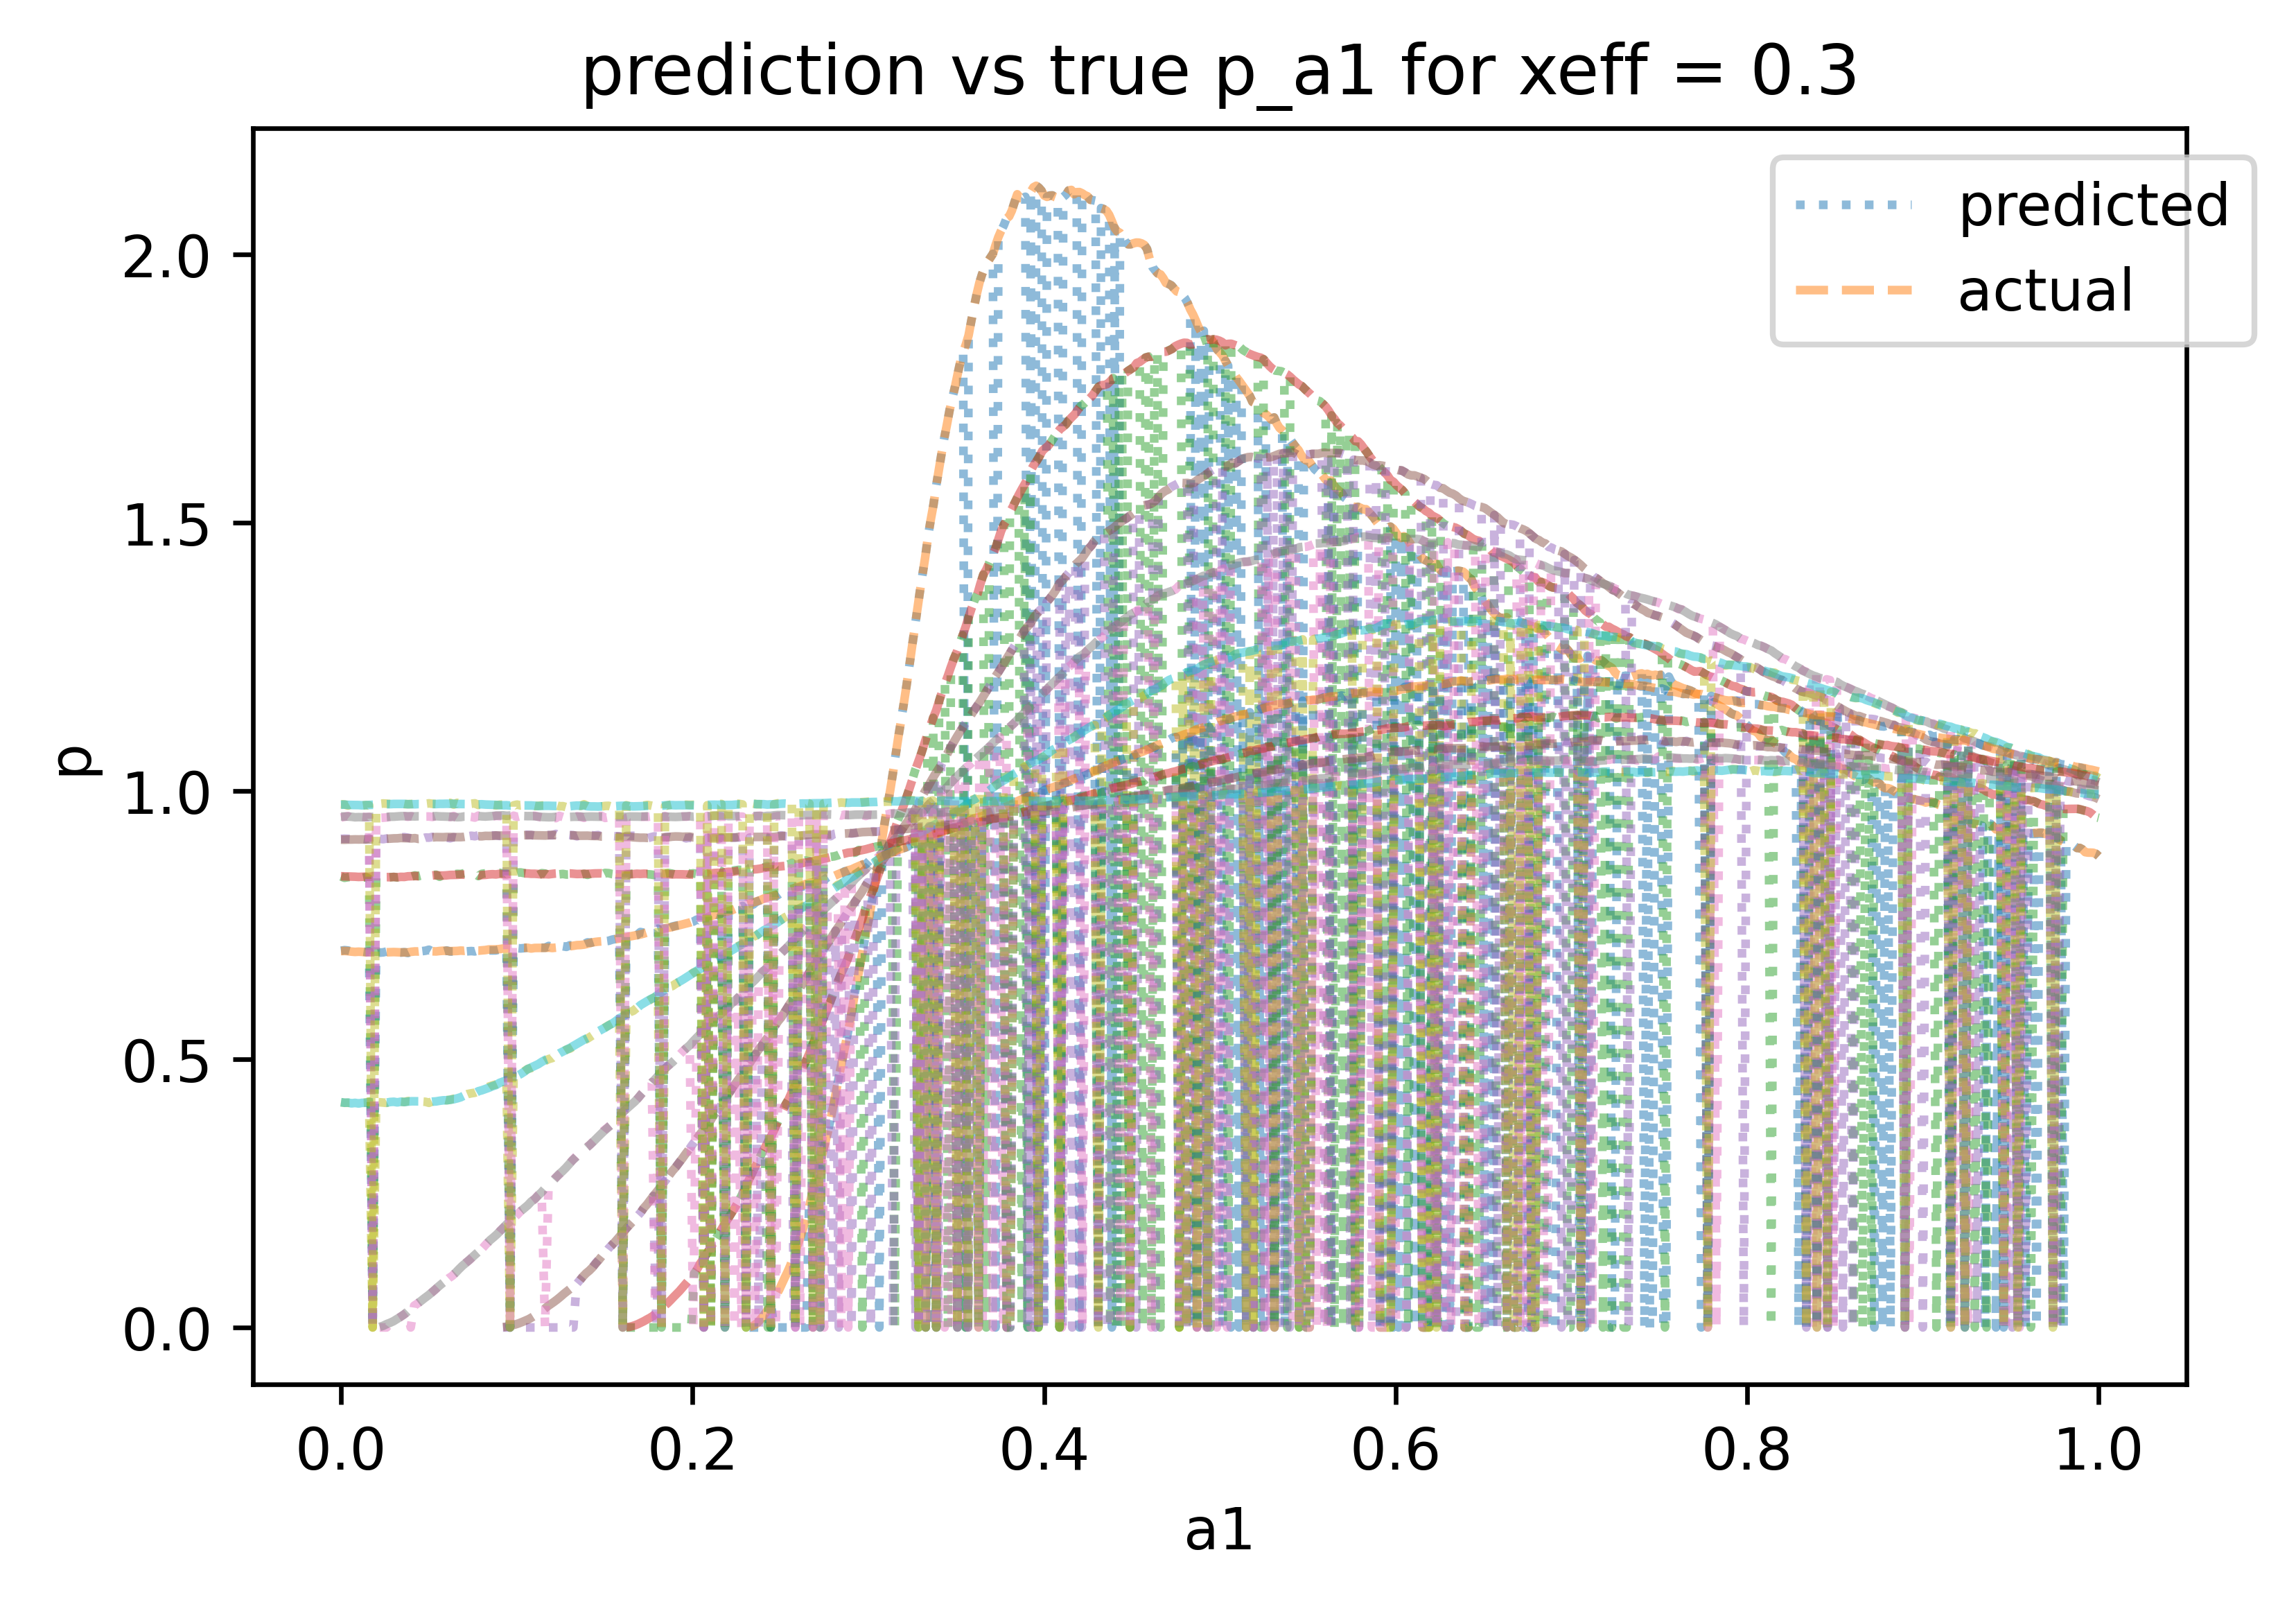

In [22]:
eva_model(model)

In [23]:
Input1 = Input(shape=(len(ls_q[0]),))
Input2 = Input(shape=(len(ls_a1[0]),))
merged = keras.layers.concatenate([Input1, Input2]) # 1000 elements
x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) 
#
# callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=200)
model = Model(inputs=[Input1,Input2], outputs=output)
# opt = keras.optimizers.Adam(learning_rate=3e-2)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit([ls_q, ls_a1],ls_p, epochs=5500,batch_size=40, verbose=2)

Epoch 1/5500
1/1 - 0s - loss: 1.0080 - accuracy: 0.0000e+00 - 316ms/epoch - 316ms/step
Epoch 2/5500
1/1 - 0s - loss: 0.7805 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 3/5500
1/1 - 0s - loss: 0.6210 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 4/5500
1/1 - 0s - loss: 0.5239 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 5/5500
1/1 - 0s - loss: 0.4814 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 6/5500
1/1 - 0s - loss: 0.4459 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 7/5500
1/1 - 0s - loss: 0.4167 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 8/5500
1/1 - 0s - loss: 0.3948 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 9/5500
1/1 - 0s - loss: 0.3770 - accuracy: 0.0000e+00 - 12ms/epoch - 12ms/step
Epoch 10/5500
1/1 - 0s - loss: 0.3654 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 11/5500
1/1 - 0s - loss: 0.3538 - accuracy: 0.0000e+00 - 10ms/epoch - 10ms/step
Epoch 12/5500
1/1 - 0s - loss: 0.3420 - accuracy: 0.0000e+00 - 16ms/epoch - 1

1/1 [==============================] - 0s 174ms/step - loss: 0.1553 - accuracy: 0.1000
accuracy: 10.00%


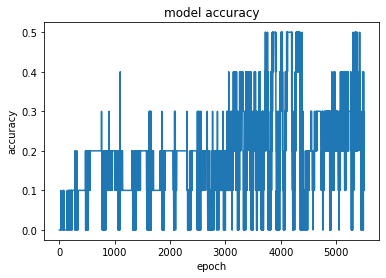

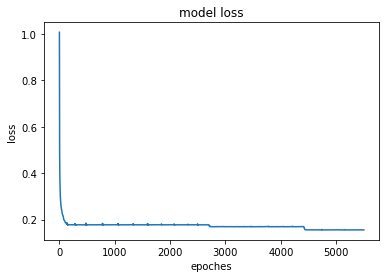

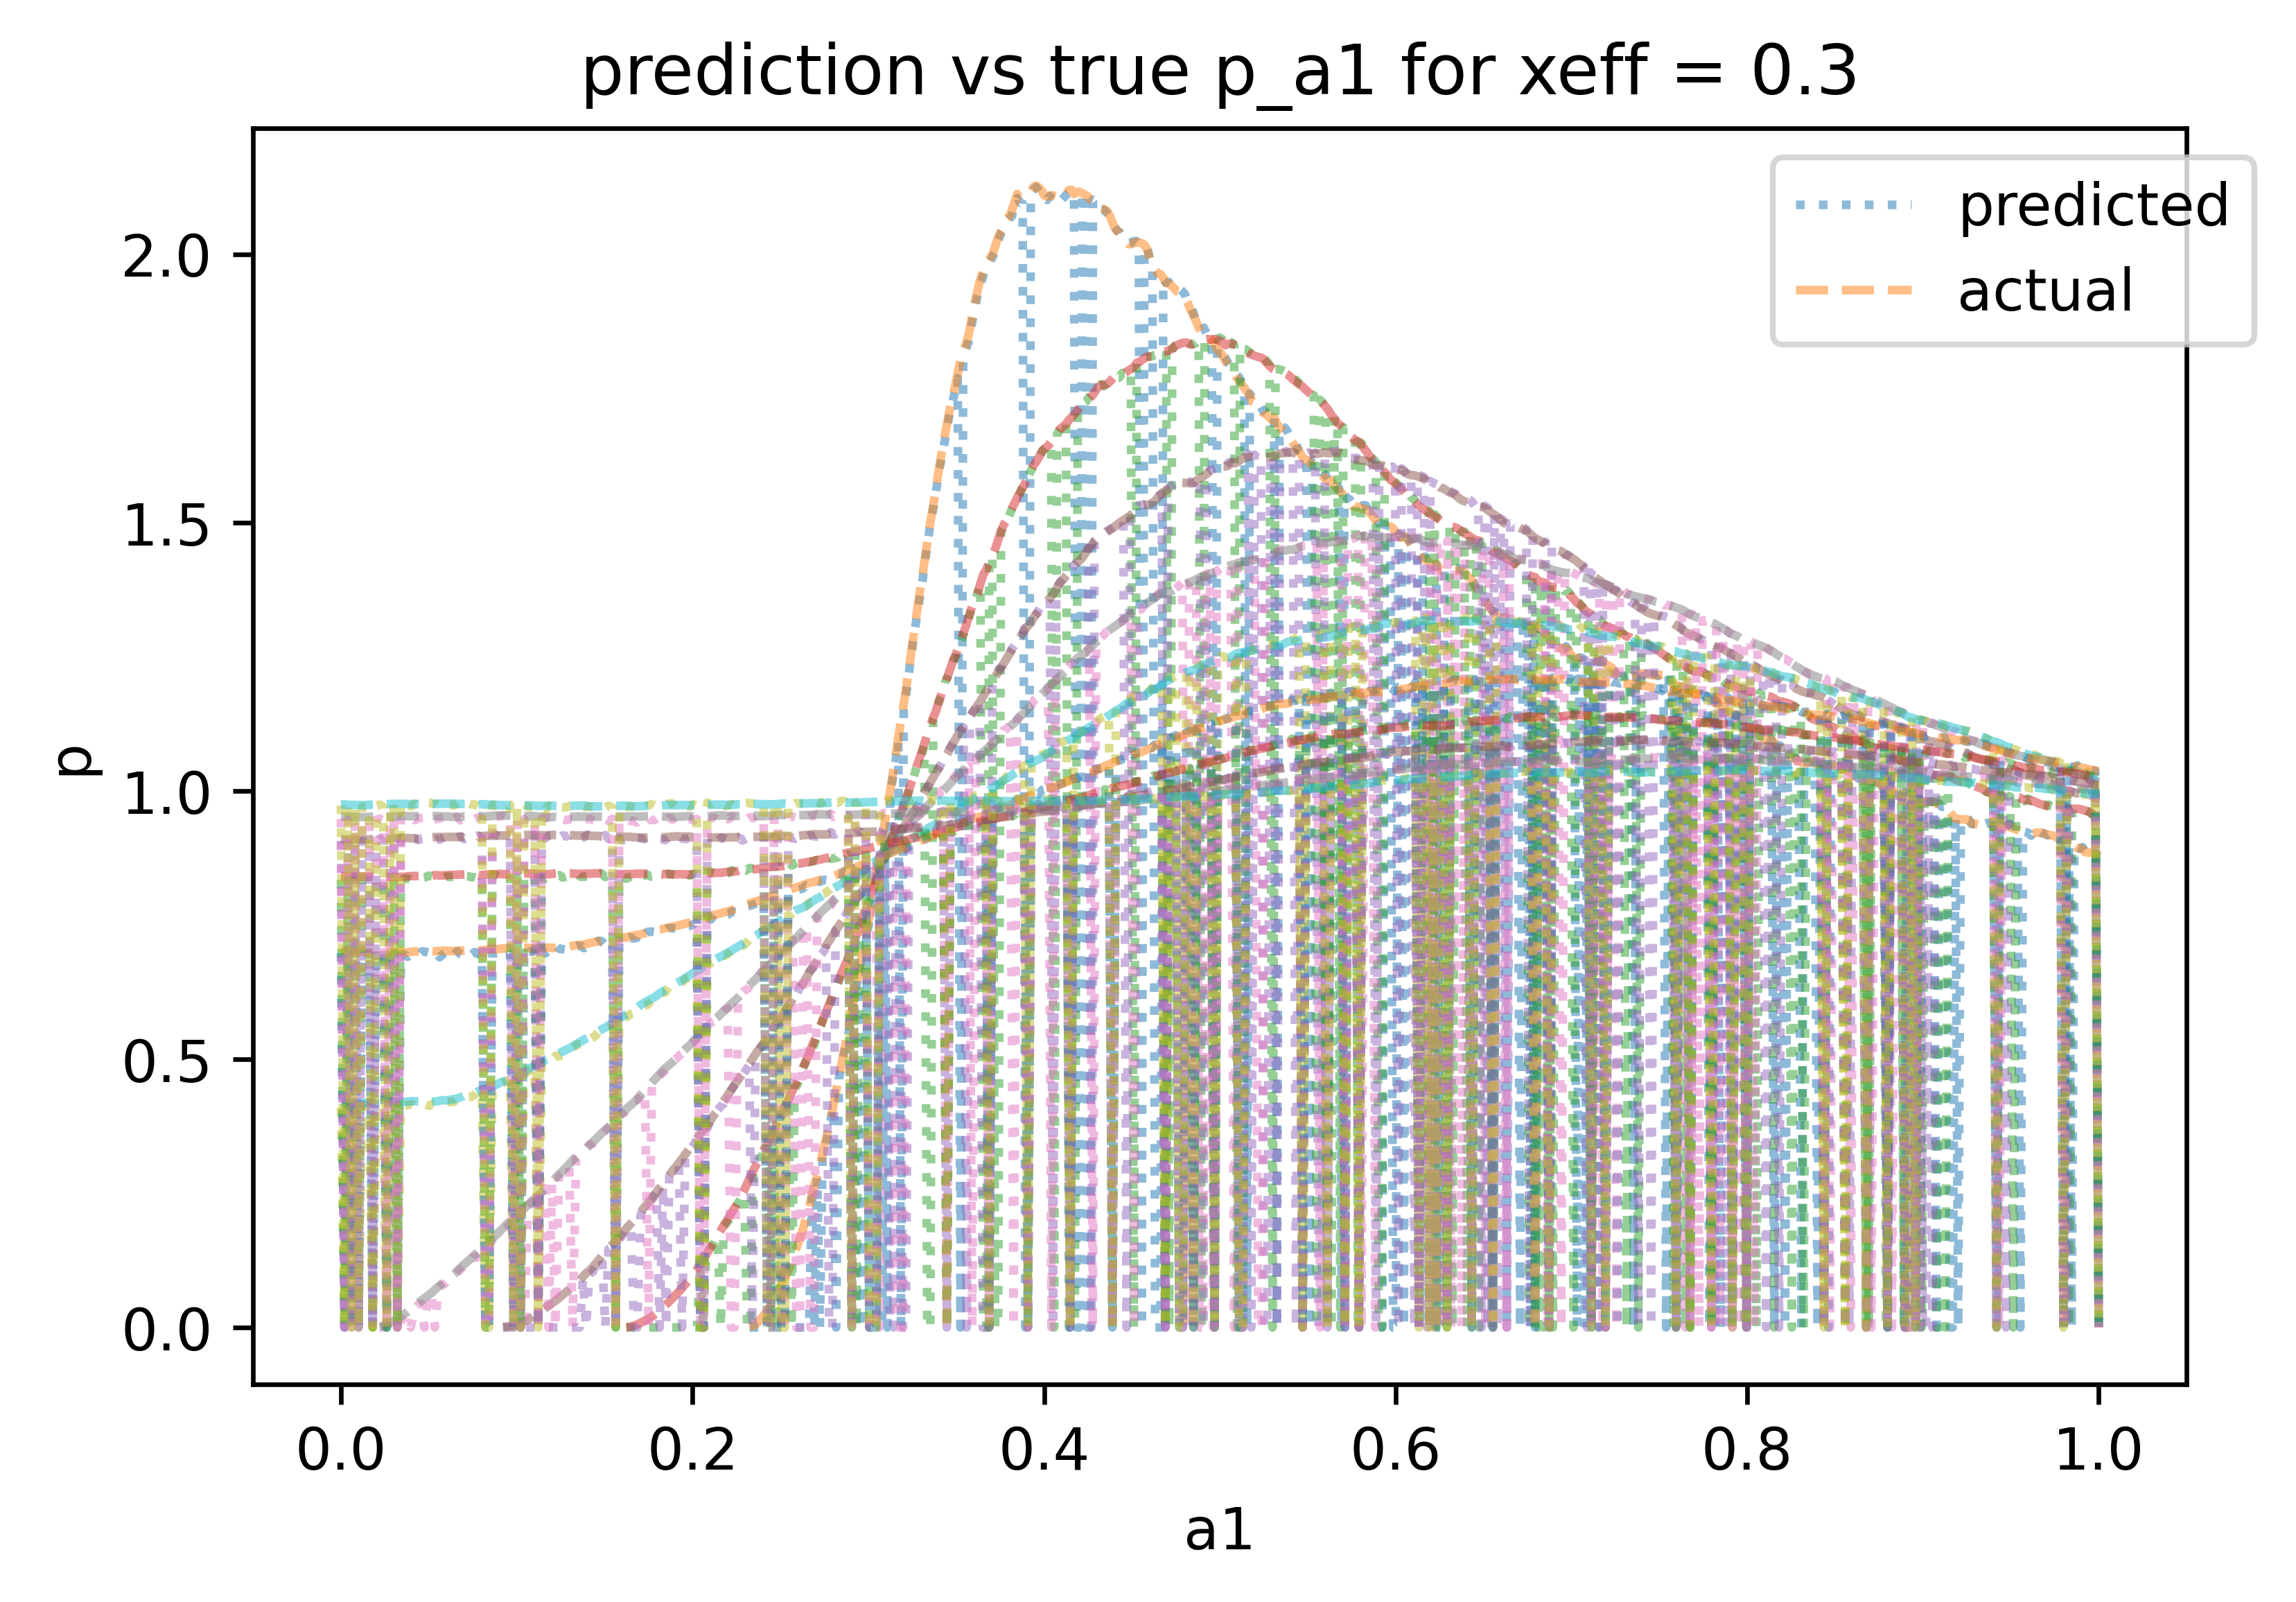

In [24]:
eva_model(model)

In [25]:
Input1 = Input(shape=(len(ls_q[0]),))
Input2 = Input(shape=(len(ls_a1[0]),))
merged = keras.layers.concatenate([Input1, Input2]) # 1000 elements
x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
# x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) 
#
# callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=200)
model = Model(inputs=[Input1,Input2], outputs=output)
# opt = keras.optimizers.Adam(learning_rate=3e-2)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit([ls_q, ls_a1],ls_p, epochs=5500,batch_size=40, verbose=2)

Epoch 1/5500
1/1 - 0s - loss: 1.3813 - accuracy: 0.0000e+00 - 323ms/epoch - 323ms/step
Epoch 2/5500
1/1 - 0s - loss: 0.9924 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 3/5500
1/1 - 0s - loss: 0.7305 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 4/5500
1/1 - 0s - loss: 0.5416 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 5/5500
1/1 - 0s - loss: 0.3760 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 6/5500
1/1 - 0s - loss: 0.2613 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 7/5500
1/1 - 0s - loss: 0.1858 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 8/5500
1/1 - 0s - loss: 0.1344 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 9/5500
1/1 - 0s - loss: 0.1053 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 10/5500
1/1 - 0s - loss: 0.0921 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 11/5500
1/1 - 0s - loss: 0.0899 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 12/5500
1/1 - 0s - loss: 0.0918 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/st